# Welcome to BankCraft
====================

In [1]:
import os
import sys
from pathlib import Path

# Add src to path
project_root = Path().absolute().parent
src_path = str(project_root / "src")
if src_path not in sys.path:
    sys.path.insert(0, src_path)

# Now you can import bankcraft normally
from bankcraft import BankCraftModel, BankCraftModelBuilder
from bankcraft import Visualization

In [2]:
model = BankCraftModelBuilder.build_default_model(num_people=100, initial_money=1000, num_banks=3, width=15, height=15)

print(f"Model initialized with {model._num_people} people, {model._num_banks} banks, and a grid size of {model.grid.width}x{model.grid.height}")
print(f"Starting time is {model.current_time}")
model.run(steps=365)
print(f"Model ran for {model.steps} steps and ended at {model.current_time}")


Model initialized with 100 people, 3 banks, and a grid size of 15x15
Starting time is 2023-01-01 00:00:00
Model ran for 365 steps and ended at 2023-01-03 12:50:00


In [3]:
print(f"Running model for 1 day")
model.run(duration="1 day")
print(f"Model ran a total of {model.steps} steps and ended at {model.current_time}")

print(f"Running model for 1 hour")
model.run(duration="1 hour")
print(f"Model ran a total of {model.steps} steps and ended at {model.current_time}")

Running model for 1 day
Model ran a total of 509 steps and ended at 2023-01-04 12:50:00
Running model for 1 hour
Model ran a total of 515 steps and ended at 2023-01-04 13:50:00


(<Figure size 1000x1000 with 1 Axes>,
 <Axes: title={'center': 'Agent Positions on Grid'}, xlabel='X Position', ylabel='Y Position'>)

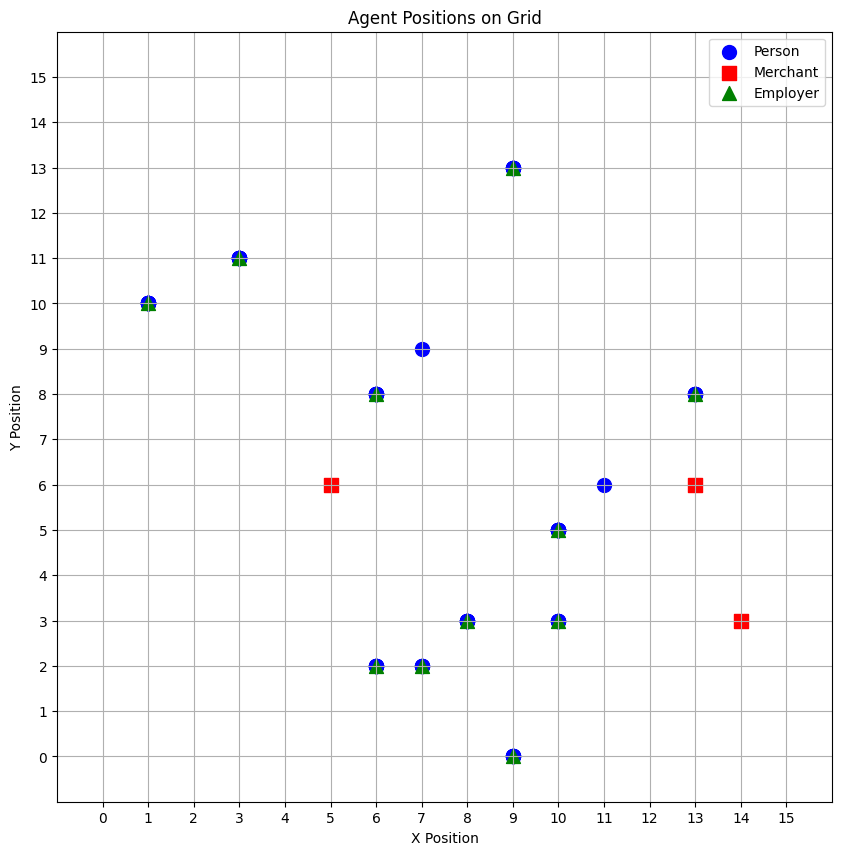

In [4]:
vis = Visualization(model)
vis.grid_plot()


# Longer Simulation Runs
====================

In [6]:
import datetime
from bankcraft import BankCraftModelBuilder
from bankcraft import Visualization

# Create a default model
model = BankCraftModelBuilder.build_default_model(
    num_people=50,
    initial_money=2000,
    num_banks=2,
    width=30,
    height=30
)

# Configure population dynamics
model.person_move_in_rate = 0.002   # 0.2% chance per step
model.person_move_out_rate = 0.001  # 0.1% chance per step
model.business_open_rate = 0.0005   # 0.05% chance per step
model.business_close_rate = 0.0005  # 0.05% chance per step

# Run for 1 month
model.run(duration="1 month")

# Add a specific person
new_person = model.add_person(initial_money=5000)

# Run until a specific date
target_date = model.current_time + datetime.timedelta(days=15)
model.run_until(target_date)

# Analyze results
transactions_df = model.get_transactions()
people_df = model.get_people()

# Get a specific agent's diary
agent_id = model.agents[0].unique_id
agent_diary = model.get_agent_diary(agent_id)
print(agent_diary)

# Save results
model.save_to_csv(base_filename="simulation_results")

# Visualize
vis = Visualization(model)
vis.grid_plot()

AttributeError: 'float' object has no attribute 'bank_accounts'